<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


Looking for: ['bs4==4.10.0']

[+] 0.0s
pkgs/main/linux-64 (check zst)                     Checked  0.1s
[+] 0.0s
pkgs/main/noarch (check zst) ━━━━╸━━━━━━━━━━━   0.0 B @  ??.?MB/s Checking  0.0spkgs/main/noarch (check zst)                        Checked  0.0s
[+] 0.0s
pkgs/r/linux-64 (check zst)                        Checked  0.0s
[+] 0.0s
pkgs/r/noarch (check zst)                          Checked  0.0s
[+] 0.0s
pkgs/main/linux-64 ━━━━━━━━━╸━━━━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.0s[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━━╸━━━━━━━━━━━━━━━   2.2MB /   5.6MB @  24.7MB/s  0.1s
pkgs/main/noarch   ━━━━━━━━━━━━━━━━━━━━━━━━━ 697.6kB / 697.6kB @   7.5MB/s  0.1s
pkgs/r/linux-64    ━━━━━━━━━━━━╸━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s
pkgs/r/noarch      ━━━━━╸━━━━━━━━━━━━━━━━━━━ 539.6kB /   2.0MB @   9.5MB/s  0.1spkgs/main/noarch                                   697.6kB @   7.5MB/s  0.2s
pkgs/r/linux-64                                      1.6MB @  15.0MB/s  0.2s
[+] 0.2s
pkgs/mai

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [5]:
import yfinance as yf
TSLA = yf.Ticker('TSLA')
a=TSLA.history(period='max')
print(a)

                  Open        High         Low       Close     Volume  \
Date                                                                    
2010-06-29    1.266667    1.666667    1.169333    1.592667  281494500   
2010-06-30    1.719333    2.028000    1.553333    1.588667  257806500   
2010-07-01    1.666667    1.728000    1.351333    1.464000  123282000   
2010-07-02    1.533333    1.540000    1.247333    1.280000   77097000   
2010-07-06    1.333333    1.333333    1.055333    1.074000  103003500   
...                ...         ...         ...         ...        ...   
2023-11-13  215.600006  225.399994  211.610001  223.710007  140447600   
2023-11-14  235.029999  238.139999  230.720001  237.410004  149771600   
2023-11-15  239.289993  246.699997  236.449997  242.839996  150354000   
2023-11-16  239.490005  240.880005  230.960007  233.589996  136816800   
2023-11-17  232.000000  237.389999  226.539993  234.300003  142532800   

            Dividends  Stock Splits  
Date        

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [6]:
a.reset_index(inplace=True)

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [7]:
print(a)

           Date        Open        High         Low       Close     Volume  \
0    2010-06-29    1.266667    1.666667    1.169333    1.592667  281494500   
1    2010-06-30    1.719333    2.028000    1.553333    1.588667  257806500   
2    2010-07-01    1.666667    1.728000    1.351333    1.464000  123282000   
3    2010-07-02    1.533333    1.540000    1.247333    1.280000   77097000   
4    2010-07-06    1.333333    1.333333    1.055333    1.074000  103003500   
...         ...         ...         ...         ...         ...        ...   
3367 2023-11-13  215.600006  225.399994  211.610001  223.710007  140447600   
3368 2023-11-14  235.029999  238.139999  230.720001  237.410004  149771600   
3369 2023-11-15  239.289993  246.699997  236.449997  242.839996  150354000   
3370 2023-11-16  239.490005  240.880005  230.960007  233.589996  136816800   
3371 2023-11-17  232.000000  237.389999  226.539993  234.300003  142532800   

      Dividends  Stock Splits  
0             0           0.0  

## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [8]:
import bs4
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
response = requests.get(url)
html_data = response.text
print(html_data)



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

Parse the html data using `beautiful_soup`.


In [11]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_data, 'html.parser')
print(soup.prettify())


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Tesla Revenue 2010-2022 | TSLA | MacroTrends
  </title>
  <meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter end

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [22]:
import pandas as pd

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Read the HTML tables into a list of dataframes
tables = pd.read_html(url)

# Assume the table you want is the first one
tesla_revenue = tables[0]

# Rename columns
tesla_revenue.columns = ["Date", "Revenue"]

print(tesla_revenue)


    Date  Revenue
0   2021  $53,823
1   2020  $31,536
2   2019  $24,578
3   2018  $21,461
4   2017  $11,759
5   2016   $7,000
6   2015   $4,046
7   2014   $3,198
8   2013   $2,013
9   2012     $413
10  2011     $204
11  2010     $117
12  2009     $112


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [23]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Execute the following lines to remove an null or empty strings in the Revenue column.


In [24]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [25]:
print(tesla_revenue.tail(5))

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [30]:
!pip install yfinance
import yfinance as yf
 
tick = 'GME'
stock = yf.Ticker(tick)


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [31]:
gme_data = stock.history(period='max')
print(gme_data)

                                Open       High        Low      Close  \
Date                                                                    
2002-02-13 00:00:00-05:00   1.620128   1.693350   1.603296   1.691667   
2002-02-14 00:00:00-05:00   1.712707   1.716073   1.670626   1.683250   
2002-02-15 00:00:00-05:00   1.683250   1.687458   1.658002   1.674834   
2002-02-19 00:00:00-05:00   1.666417   1.666417   1.578047   1.607504   
2002-02-20 00:00:00-05:00   1.615921   1.662210   1.603296   1.662210   
...                              ...        ...        ...        ...   
2023-11-14 00:00:00-05:00  12.750000  13.390000  12.690000  12.900000   
2023-11-15 00:00:00-05:00  13.150000  13.500000  13.030000  13.270000   
2023-11-16 00:00:00-05:00  13.140000  13.190000  12.520000  12.530000   
2023-11-17 00:00:00-05:00  12.520000  13.060000  12.520000  13.030000   
2023-11-20 00:00:00-05:00  13.000000  13.200000  12.800000  12.800000   

                             Volume  Dividends  St

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [32]:
historical_data_reset_index = historical_data.reset_index()

print(historical_data_reset_index)

                          Date       Open       High        Low      Close  \
0    2002-02-13 00:00:00-05:00   1.620129   1.693350   1.603296   1.691667   
1    2002-02-14 00:00:00-05:00   1.712707   1.716074   1.670626   1.683251   
2    2002-02-15 00:00:00-05:00   1.683251   1.687459   1.658002   1.674834   
3    2002-02-19 00:00:00-05:00   1.666417   1.666417   1.578047   1.607504   
4    2002-02-20 00:00:00-05:00   1.615920   1.662210   1.603296   1.662210   
...                        ...        ...        ...        ...        ...   
5476 2023-11-14 00:00:00-05:00  12.750000  13.390000  12.690000  12.900000   
5477 2023-11-15 00:00:00-05:00  13.150000  13.500000  13.030000  13.270000   
5478 2023-11-16 00:00:00-05:00  13.140000  13.190000  12.520000  12.530000   
5479 2023-11-17 00:00:00-05:00  12.520000  13.060000  12.520000  13.030000   
5480 2023-11-20 00:00:00-05:00  13.000000  13.200000  12.800000  12.800000   

        Volume  Dividends  Stock Splits  
0     76216000       

## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [2]:
import requests
from bs4 import BeautifulSoup

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
data = requests.get(url)
html_data = data.text



Parse the html data using `beautiful_soup`.


In [37]:
soup = BeautifulSoup(html_data, 'html.parser')  # Corrected 'html_parser' to 'html.parser'
z=soup.prettify()
print(z)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style="">
 <!--<![endif]-->
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript">
  </script>
  <script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript">
  </script>
  <s

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [57]:
import pandas as pd
a = pd.read_html(z) [1]
a.columns = ["Date", "Revenue"]
gme_revenue = a
print(gme_revenue)




          Date Revenue
0   2020-04-30  $1,021
1   2020-01-31  $2,194
2   2019-10-31  $1,439
3   2019-07-31  $1,286
4   2019-04-30  $1,548
..         ...     ...
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709

[62 rows x 2 columns]


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [58]:
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


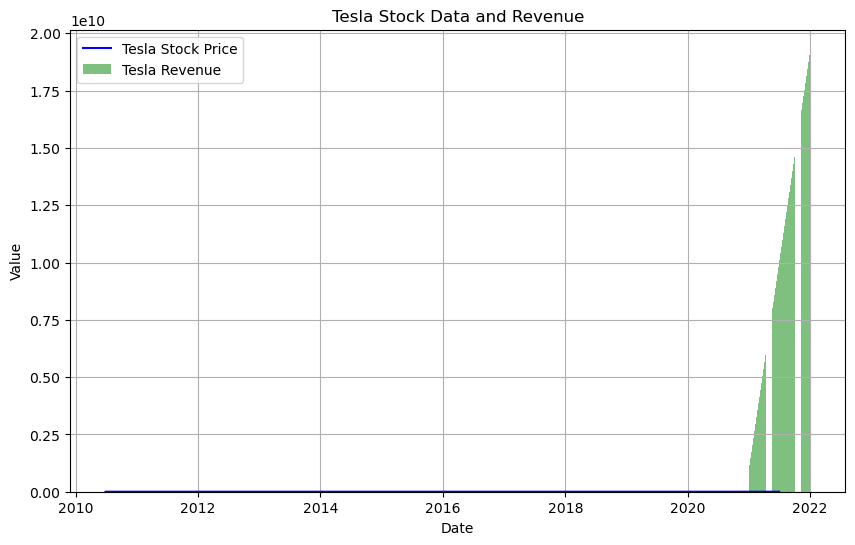

In [75]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch Tesla stock data
def get_tesla_stock_data():
    ticker_symbol = "TSLA"
    stock = yf.Ticker(ticker_symbol)
    data = stock.history(period='max')
    return data.reset_index()

# Function to fetch real Tesla revenue data (replace this with your actual revenue data)
def get_tesla_revenue_data():
    # For illustration purposes, we'll use a placeholder for revenue data
    revenue_data = pd.DataFrame({
        "Date": pd.date_range(start="2021-01-01", end="2021-12-31"),
        "Revenue": [1.0e9 + i * 5.0e7 for i in range(365)]  # Placeholder: randomly generated revenue
    })
    return revenue_data

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    # Plotting Tesla Stock Data
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Tesla Stock Price', color='blue')

    # Plotting Tesla Revenue Data
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], label='Tesla Revenue', color='green', alpha=0.5)

    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Fetch real Tesla stock data
tesla_data = get_tesla_stock_data()

# Fetch real Tesla revenue data (replace with your actual revenue data)
tesla_revenue = get_tesla_revenue_data()

# Call make_graph function
make_graph(tesla_data.loc[tesla_data['Date'] <= '2021-06-30'], tesla_revenue, 'Tesla Stock Data and Revenue')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


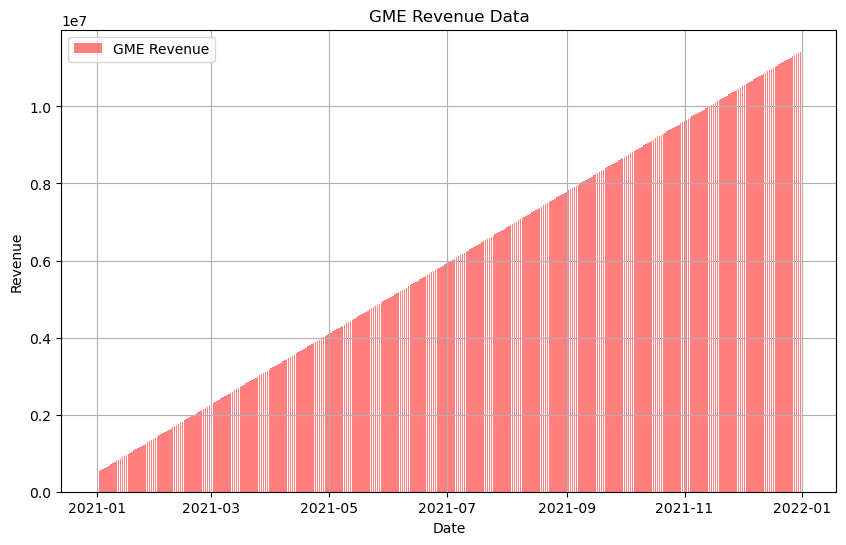

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Assuming you have GME revenue data
# Replace this with your actual GME revenue data
gme_revenue = pd.DataFrame({
    "Date": pd.date_range(start="2021-01-01", end="2021-12-31"),
    "Revenue": [500000 + i * 30000 for i in range(365)]  # Placeholder: randomly generated revenue
})

# Define the make_graph function
def make_graph(revenue_data, title):
    # Plotting GME Revenue Data
    plt.figure(figsize=(10, 6))
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], label='GME Revenue', color='red', alpha=0.5)

    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Call make_graph function for GME revenue
make_graph(gme_revenue, 'GME Revenue Data')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
